# Comparing Frequency Distributions


Experienced          25
Little experience    42
Rookie               23
Very experienced     37
Veteran              16
Name: Exp_ordinal, dtype: int64


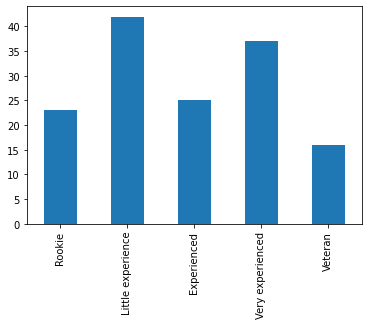

In [1]:
import pandas as pd
wnba = pd.read_csv('wnba.csv')
wnba2 = pd.read_csv('wnba2.csv')

def make_exp_ordinal(row):
    if (0 < row['Experience'] <=3):
        return 'Little experience'
    if (3 < row['Experience'] <= 5):
        return 'Experienced'
    if (5 < row['Experience'] <= 10):
        return 'Very experienced'
    if row['Experience'] > 10:
      return'Veteran'
    else:
        return 'Rookie'

wnba['Exp_ordinal'] = wnba.apply(make_exp_ordinal, axis = 1)
freq_table = wnba['Exp_ordinal'].value_counts().sort_index()

print(freq_table)
wnba['Exp_ordinal'].value_counts().iloc[[3,0,2,1,4]].plot.bar()

G      14
C       4
F       4
F/C     1
Name: Pos, dtype: int64 

 G      14
F      13
C       8
F/C     4
G/F     3
Name: Pos, dtype: int64 

 G      9
C      6
F      6
F/C    2
G/F    2
Name: Pos, dtype: int64 

 G      16
F       6
C       6
G/F     5
F/C     4
Name: Pos, dtype: int64 

 G      7
F      4
G/F    3
C      1
F/C    1
Name: Pos, dtype: int64


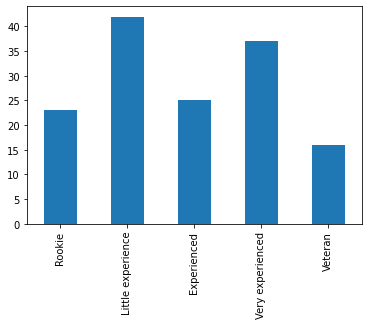

In [3]:
def experienced(value):
    if value == 'R':
        return 'Rookie'
    if 1 <= int(value) <= 3:
        return 'Little experience'
    if 3 < int(value) <= 5:
        return 'Experienced'
    if 5 < int(value) <= 10:
        return 'Very experienced'
    else:
        return 'Veteran'
    
wnba2['Exp_ordinal'] = wnba2['Experience'].apply(experienced)
rookies = wnba[wnba['Exp_ordinal'] == 'Rookie']
little_xp = wnba[wnba['Exp_ordinal'] == 'Little experience']
experienced = wnba[wnba['Exp_ordinal'] == 'Experienced']
very_xp = wnba[wnba['Exp_ordinal'] == 'Very experienced']
veterans =  wnba[wnba['Exp_ordinal'] == 'Veteran']
rookie_distro = rookies['Pos'].value_counts()
little_xp_distro = little_xp['Pos'].value_counts()
experienced_distro = experienced['Pos'].value_counts()
very_xp_distro = very_xp['Pos'].value_counts()
veteran_distro = veterans['Pos'].value_counts()

print(rookie_distro, '\n\n', little_xp_distro, '\n\n', experienced_distro, '\n\n',
      very_xp_distro, '\n\n', veteran_distro)


wnba2['Exp_ordinal'].value_counts().iloc[[3,0,2,1,4]].plot.bar()

***
## Grouped Bar Plots

Because we grouped all the bar plots together, the graph above is called a grouped bar plot. We can generate a grouped bar plot just like the one above using the seaborn.countplot() function from the seaborn module, which you might already be familiar with from our visualization courses. In the code snippet below, we will:
  * Import the seaborn module with the alias sns.
  * Generate the plot with sns.countplot(). We'll use the following parameters for this function:
      * x — specifies as a string the name of the column we want on the x-axis. We'll place the Exp_ordinal column on the x-axis.
      * hue — specifies as a string the name of the column we want the bar plots generated for. We want to generate the bar plots for the Pos column.
      * data - specifies the name of the variable which stores the data set. We stored the data in a variable named wnba.

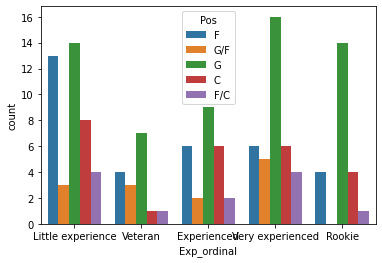

In [6]:
import seaborn as sns
sns.countplot(x = 'Exp_ordinal', hue = 'Pos', data = wnba2)

Using `sns.countplot()`, generate a grouped bar plot similar to the one above.
  * Place the `Exp_ordinal` variable on the x-axis.
  * Generate the bar plots for the Pos variable. The data set is stored in wnba variable.
  * Using the `order` parameter of `sns.countplot()`, order the values on the x-axis in ascending order. The `order` parameter takes in a list of strings, so you should use `order = ['Rookie', 'Little experience', ..........]`.
  * Using the `hue_order` parameter, order the bars of each bar plot in ascending alphabetic order. `hue_order` takes in a list of strings, so you can use `hue_order = ['C', 'F', ......]`.


   `NOTE`: I Imported rcParams to add the ability to change the figure size 
  ```Python
  # figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
```

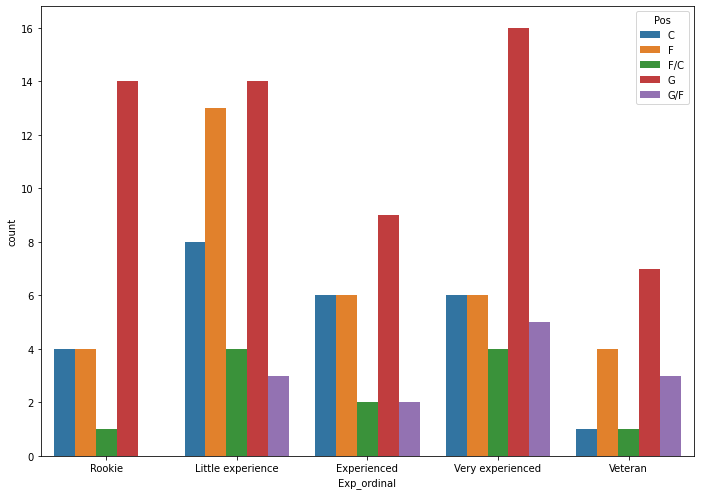

In [12]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
sns.countplot(x = 'Exp_ordinal', hue='Pos', data = wnba2, order=['Rookie','Little experience', 'Experienced', 'Very experienced', 'Veteran'], hue_order=['C','F','F/C','G','G/F'])

***
## Challenge: Do Older Players Play Less?

  * Generate a grouped bar plot to confirm or reject our hypothesis. Using `sns.countplot()`:
    * Place the `age_mean_relative` variable on the x-axis. The `age_mean_relative` and `min_mean_relative` are already defined.
    * Generate the frequency distributions for the `min_mean_relative` variable.
  * Analyze the graph and determine whether the data confirms or rejects our hypothesis. If it's a confirmation assign the string `'confirmation'` to a variable named `result`. If it's a `rejection`, assign the string `'rejection'` to the variable result.

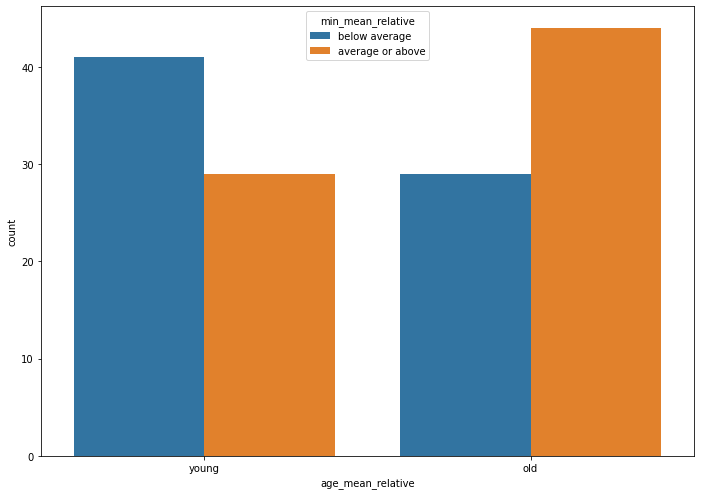

In [14]:
wnba['age_mean_relative'] = wnba['Age'].apply(lambda x: 'old' if x >= 27 else 'young')
wnba['min_mean_relative'] = wnba['MIN'].apply(lambda x: 'average or above' if x >= 497 else 'below average')

sns.countplot(x = 'age_mean_relative', hue = 'min_mean_relative', data = wnba)
result = 'rejection'

***
## Comparing Histograms

The easiest way to compare two histograms is to superimpose one on top of the other. We can do that by using the pandas visualization methods we learned in the previous lesson:

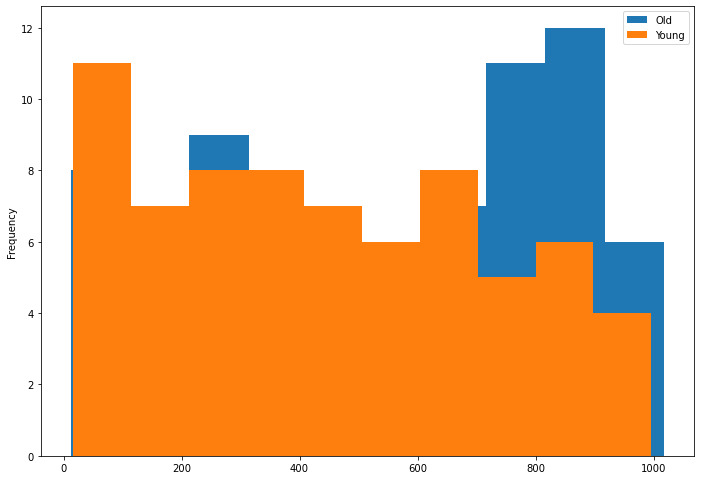

In [15]:
wnba2[wnba2.Age >= 27]['MIN'].plot.hist(label = 'Old', legend = True)
wnba2[wnba2.Age < 27]['MIN'].plot.hist(label = 'Young', legend = True)

We can now see that most of the old players that belong to the "average or above" category play significantly more than average. The main downside of the visualization above is that the histogram for young players covers a large part of the other histogram. We can fix this easily by plotting only the shape of the histograms. We can do this using the `histtype` parameter and choose the `'step'` type:

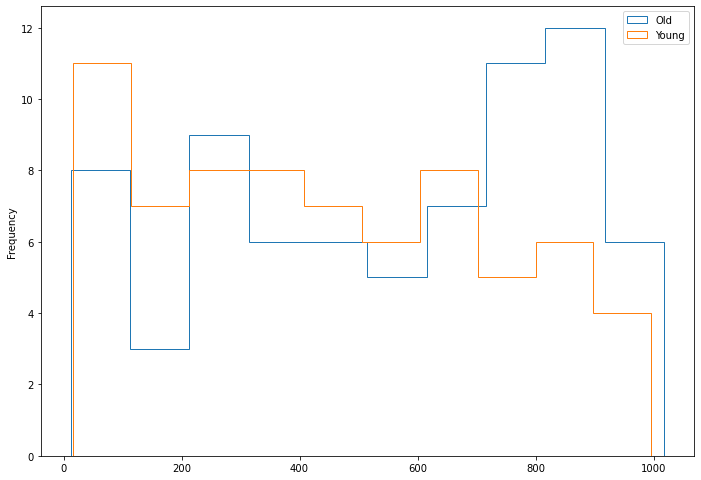

In [16]:
wnba[wnba.Age >= 27]['MIN'].plot.hist(histtype = 'step', label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.hist(histtype = 'step', label = 'Young', legend = True)

Looking on our graph above, it's not easy to visualize where the average number of minutes is. Using the `plt.axvline()` function, add a vertical line to demarcate the average point:
  * The vertical line should be at point 497 on the x-axis.
  * Use the `label` parameter of `plt.axvline()` to label it `'Average'`. Display the label by running `plt.legend()`.
  * Specify `plt.show()` to display the plot.

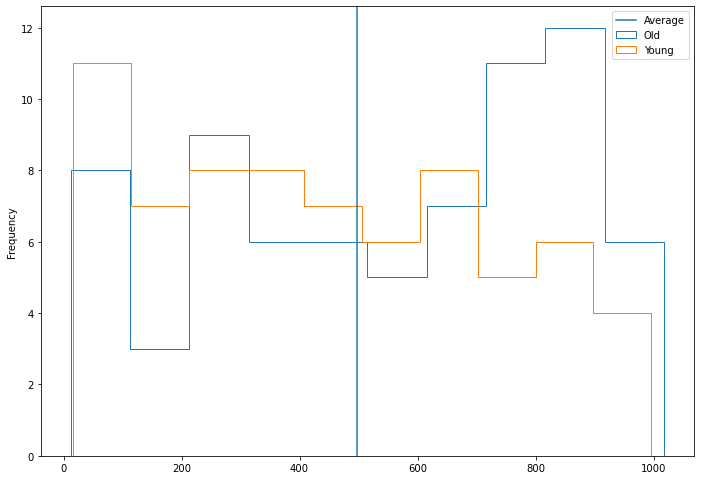

In [18]:
import matplotlib.pyplot as plt
wnba[wnba.Age >= 27]['MIN'].plot.hist(histtype = 'step', label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.hist(histtype = 'step', label = 'Young', legend = True)
plt.axvline(497, label = 'Average')
plt.legend()
plt.show()

***
## Kernel density Estimate Plots

We can smooth out our two histograms above for old and young players using the `Series.plot.kde()` function:

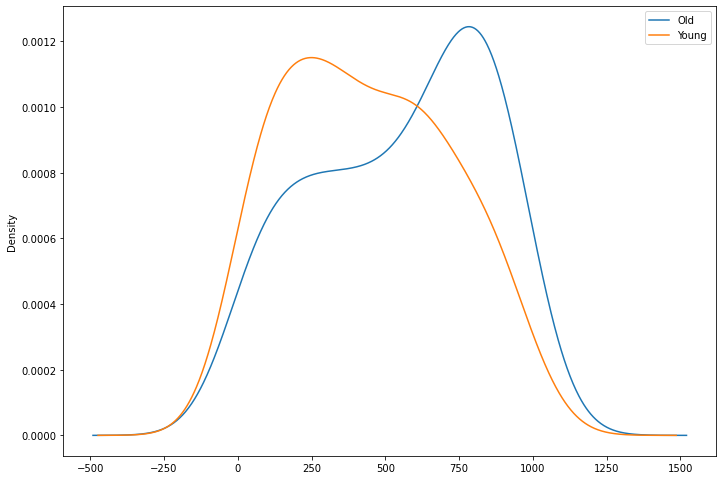

In [19]:
wnba[wnba.Age >= 27]['MIN'].plot.kde(label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.kde(label = 'Young', legend = True)

Each of the smoothed histograms above is called a **kernel density estimate plot** or, shorter, **kernel density plot**. Unlike histograms, kernel density plots display densities on the y-axis instead of frequencies. The density values are actually probability values — which we'll be able to understand more about after the probability courses. All you need to know for now is that we can use kernel density plots to get a much clear picture about the shape of a distribution.

* Reproduce the kernel density plots above, and add a vertical line to demarcate the average point.
    * The vertical line should be at point 497 on the x-axis.
    * Label the vertical line `'Average'` and make sure the label is displayed in the legend.
    * Specify `plt.show()` to display the plot.
* Can we still see that most of the old players that belong to the "average or above" category play significantly more than average? If so, is the pattern more obvious (faster to observe) than in the case of the step-type histograms?

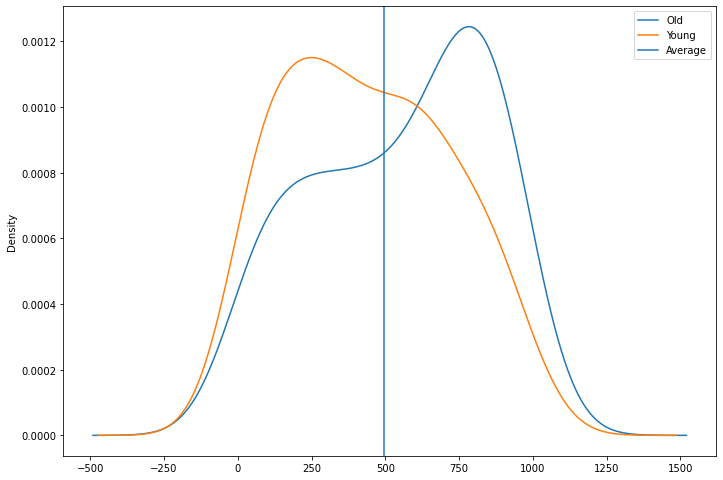

In [20]:
wnba[wnba.Age >= 27]['MIN'].plot.kde(label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.kde(label = 'Young', legend = True)
plt.axvline(497, label = 'Average')
plt.legend()
plt.show()